## Applied Homework

## Questions 5

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to
predict default.

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

dir = '/Users/shuya/Documents/Statistical Learning/Data/'

## Question 5

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to
predict default.

In [47]:
default = pd.read_csv(dir + "Default.csv", index_col='Unnamed: 0')
default['default']=default['default'].map({'No':0,'Yes':1})
default['student']=default['student'].map({'No':0,'Yes':1})
default.head()
default.groupby(['default']).sum()

,student,balance,income
default,,,
0,2817,7.771724e+06,3.244841e+08
1,127,5.820246e+05,1.068569e+07


In [40]:
def logistic_reg(X_train,y_train,X_test,y_test):
    logit_reg = skl_lm.LogisticRegression(C=1e3)
    logit_reg.fit(X = X_train, y = y_train)    
    return accuracy_score(y_test,logit_reg.predict(X_test))
    
logistic_reg(default[['balance','income']],default[['default']],default[['balance','income']],default[['default']])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9664

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

>i. Split the sample set into a training set and a validation set.

>ii. Fit a multiple logistic regression model using only the training observations.

>iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

>iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(default[['balance','income']], default[['default']])
print('the test error is {0:0.2f}'.format(1-logistic_reg(X_train,y_train,X_test,y_test)))

the test error is 0.03


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment
on the results obtained.

In [44]:
def n_split_validation(X, y, n):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=n, random_state=1234)
    print('the test error is {0:0.5f}'.format(1-logistic_reg(X_train,y_train,X_test,y_test)))
    
n_split_validation(default[['balance','income']], default[['default']], 0.3)
n_split_validation(default[['balance','income']], default[['default']], 0.5)
n_split_validation(default[['balance','income']], default[['default']], 0.7)

the test error is 0.03300
the test error is 0.03480
the test error is 0.03267


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' i

(d) Now consider a logistic regression model that predicts the probability
of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation
set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [45]:
n_split_validation(default[['balance','income','student']], default[['default']], 0.3)
n_split_validation(default[['balance','income','student']], default[['default']], 0.5)
n_split_validation(default[['balance','income','student']], default[['default']], 0.7)

the test error is 0.03300
the test error is 0.03480
the test error is 0.03267


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' i

## Question 6

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for
the standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using
the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summary() and glm() functions, determine the estimated
standard errors for the coefficients associated with income
and balance in a multiple logistic regression model that uses
both predictors.

In [52]:
logit_model = smf.glm('default ~ income + balance', data = default, family=sm.families.Binomial()).fit()
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 16 Aug 2019   Deviance:                       1579.0
Time:                        21:17:28   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

(b) Write a function, boot.fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [56]:
def boot_fn(data, x_col, y_col):
    logit_model = skl_lm.LogisticRegression()
    logit_model.fit(data[x_col],data[y_col])
    return logit_model.coef_

boot_fn(default,['income','balance'],['default'])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.00012588,  0.00040756]])

## Question 7

In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be
used in order to compute the LOOCV test error estimate. Alternatively,
one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach
in order to compute the LOOCV error for a simple logistic
regression model on the Weekly data set. Recall that in the context

(a) Fit a logistic regressionmodel that predicts Direction using Lag1
and Lag2.

In [69]:
weekly = pd.read_csv(dir + 'Weekly.csv', index_col='Unnamed: 0')
weekly['Direction'] = weekly['Direction'].map({'Down':0,'Up':1})
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [72]:
weekly_logit = skl_lm.LogisticRegression()
weekly_logit.fit(weekly[['Lag1','Lag2']],weekly['Direction'])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

(b) Fit a logistic regressionmodel that predicts Direction using Lag1
and Lag2 using all but the first observation.

In [74]:
weekly_logit2 = skl_lm.LogisticRegression()
weekly_logit2.fit(weekly.loc[1:,['Lag1','Lag2']],weekly.loc[1:,'Direction'])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

(c) Use the model from (b) to predict the direction of the first observation.
You can do this by predicting that the first observation
will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation
correctly classified?


>I get that the first sample was classified as “Up” while the truth in this
case should have been classified as “Down”. Thus the first sample was classified
in error.

In [81]:
print(weekly_logit2.predict_proba(weekly.loc[:1,['Lag1','Lag2']]))
weekly.loc[:1,['Direction']]

[[0.42959348 0.57040652]]


,Direction
1,0


(d) Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:
    
i. Fit a logistic regression model using all but the ith observation
to predict Direction using Lag1 and Lag2.

ii. Compute the posterior probability of the market moving up
for the ith observation.

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [83]:
weekly.shape

(1089, 9)

In [118]:
error = 0
for i in np.arange(weekly.shape[0]):
    weekly_logit = skl_lm.LogisticRegression()
    train = weekly.drop(weekly.index[i])
    test = weekly.iloc[[i]]
    
    weekly_logit.fit(train[['Lag1','Lag2']], train['Direction'])
    error += abs(weekly_logit.predict(test[['Lag1','Lag2']])[0] - test['Direction'].values[0])

print('number of errors is {0:0.4f}'.format(error))

number of errors is 488.0000


(e) Take the average of the n numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.

In [119]:
print('error rate is {0:0.4f}%'.format(error/weekly.shape[0]))

error rate is 0.4498%


## Question 8

We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:
> set.seed(1)

> y=rnorm(100)

> x=rnorm(100)

> y=x-2*x^2+rnorm(100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [126]:
np.random.seed(1)

#y = np.random.randn(100)
x = np.random.randn(100)
y = ((x - 2) * (x**2)) + np.random.rand(100)

(b) Create a scatterplot of X against Y . Comment onwhat you find.

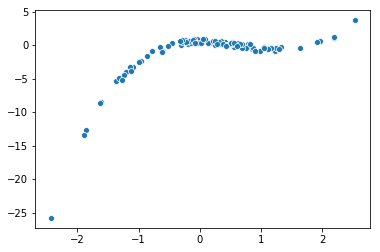

In [125]:
sns.scatterplot(x = x,y = y)

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:

i. Y = β0 + β1X + ϵ

ii. Y = β0 + β1X + β2X2 + ϵ

iii. Y = β0 + β1X + β2X2 + β3X3 + ϵ

iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ.

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [140]:
df = pd.DataFrame(np.c_[x, y], columns = ['x', 'y'])
df['x^2'] = df['x'].apply(lambda x:x**2)
df['x^3'] = df['x'].apply(lambda x:x**3)
df['x^4'] = df['x'].apply(lambda x:x**4)
df.head()

,x,y,x^2,x^3,x^4
0,1.624345,-0.184059,2.638498,4.285832,6.961671
1,-0.611756,-0.589579,0.374246,-0.228947,0.140060
2,-0.528172,0.158269,0.278965,-0.147342,0.077822
3,-1.072969,-2.790669,1.151262,-1.235268,1.325403
4,0.865408,-0.293490,0.748930,0.648130,0.560897


In [157]:
np.random.seed(1)
def loocv(df_x, df_y):
    error = 0
    for i in np.arange(df_x.shape[0]):
        train_x = df_x.drop(df_x.index[i])
        train_y = df_y.drop(df_y.index[i])
        test_x = df_x.iloc[[i]]
        test_y = df_y.iloc[[i]]
        
        ols_model = sm.OLS(train_y,train_x).fit()
        error += (ols_model.predict(test_x).values[0] - test_y.values[0])**2
        return error
    
    
    
print('error is {0:0.4f}'.format(loocv(df[['x']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2','x^3']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2','x^3','x^4']],df['y'])))

error is 13.1622
error is 0.9269
error is 0.0858
error is 0.0032


(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

>These will be the same if we change the random seed since LOOCV is a
deterministic procedure.

In [160]:
np.random.seed(2)
def loocv(df_x, df_y):
    error = 0
    for i in np.arange(df_x.shape[0]):
        train_x = df_x.drop(df_x.index[i])
        train_y = df_y.drop(df_y.index[i])
        test_x = df_x.iloc[[i]]
        test_y = df_y.iloc[[i]]        
        ols_model = sm.OLS(train_y,train_x).fit()
        error += (ols_model.predict(test_x).values[0] - test_y.values[0])**2
    return error/df_x.shape[0]
    
    
    
print('error is {0:0.4f}'.format(loocv(df[['x']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2','x^3']],df['y'])))
print('error is {0:0.4f}'.format(loocv(df[['x','x^2','x^3','x^4']],df['y'])))

error is 9.6752
error is 2.9762
error is 0.3057
error is 0.2123


## Question 9

We will now consider the Boston housing data set, from the MASS
library.

(a) Based on this data set, provide an estimate for the population
mean of medv. Call this estimate ˆμ.


(b) Provide an estimate of the standard error of ˆμ. Interpret this
result.
Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.

In [172]:
boston = pd.read_csv(dir + 'boston.csv', index_col = 'Unnamed: 0')
boston.head()
print('population mean = {0:0.3f}, and SE(μ) = {1:0.3f}'.format(boston['medv'].mean(),boston['medv'].std()/np.sqrt(len(boston['medv']))))

population mean = 22.533, and SE(μ) = 0.409


(c) Now estimate the standard error of ˆμ using the bootstrap. How
does this compare to your answer from (b)?

In [216]:
def boot_mean(df, p, n):
    mean = []
    for i in np.arange(n):
        df_sample = df.sample(n = p, replace = True)
        mean.append(df_sample['medv'].mean()) 
    return mean

print(np.mean(boot_mean(boston,1000,500)))
print(np.std(boot_mean(boston,1000,500)))


22.524020399999998
0.30072733508818306


(d) Based on your bootstrap estimate from (c), provide a 95% confidence
interval for the mean of medv. Compare it to the results
obtained using t.test(Boston$medv).
Hint: You can approximate a 95% confidence interval using the
formula [ˆμ − 2SE(ˆμ), ˆμ + 2SE(ˆμ)].

In [212]:
mean = np.mean(boot(boston,0.5,10))
upper = mean + np.std(boot(boston,0.5,10))*2
lower = mean - np.std(boot(boston,0.5,10))*2

print('the CI is [{0:0.2f}, {1:0.2f}]'.format(lower,upper))

the CI is [20.22, 21.82]


(e) Based on this data set, provide an estimate, ˆμmed, for themedian
value of medv in the population.

In [196]:
print(np.median(boston['medv']))

21.2


(f) We now would like to estimate the standard error of ˆμmed. Unfortunately,
there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.

In [210]:
def boot_median(df, p, n):
    median = []
    for i in np.arange(n):
        df_sample = df.sample(frac = p, replace = True)
        median.append(df_sample['medv'].median()) 
    return median

print(np.std(boot_median(boston,1.5,500)))

0.30781156573462254


(g) Based on this data set, provide an estimate for the tenth percentile
of medv in Boston suburbs. Call this quantity ˆμ0.1. (You
can use the quantile() function.)

In [207]:
print(np.percentile(boston['medv'],10))

12.75


(h) Use the bootstrap to estimate the standard error of ˆμ0.1. Comment
on your findings.

In [217]:
def boot_10percentile(df, p, n):
    perc10 = []
    for i in np.arange(n):
        df_sample = df.sample(frac = p, replace = True)
        perc10.append(np.percentile(df_sample['medv'],10)) 
    return perc10

print(np.std(boot_10percentile(boston,1.5,500)))

0.4188821313925912
